In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib


In [3]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 

b'2017-05-22 18:00:30 -0400 (650e8b42ac15ae72d523377520c98ca8637a2e99)'


F_cutoff: .inf
delay: {units: second, val: 0}
gain: 1
no_DC: false
poles_c: {'0': !!python/complex '-2.0-10.0j'}
preserve_plane: true
zeros_r: {'0': -10, '1': -10}



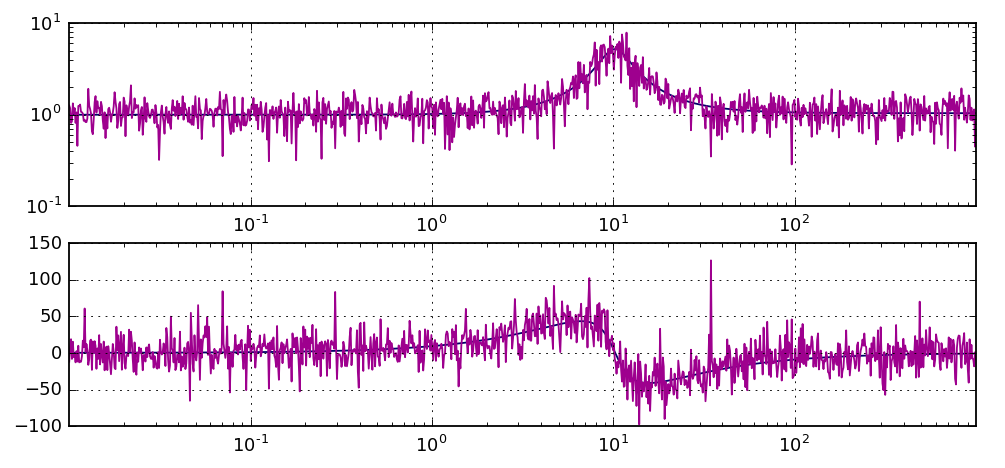

In [4]:
sys = system.BGSystem(
    F_AC = logspaced(0.01, 1000, 1000)
)
sys.own.X1 = signals.SRationalFilter(
    poles_c = (-2 - 10j, ),
    zeros_r = (-10, -10),
    gain    = 1,
)
sys.own.R1 = readouts.ACReadout(
    portN = sys.X1.ps_Out.o,
    portD = sys.X1.ps_In.i,
)

Fb = mplfigB(Nrows=2)
readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

size = len(readoutI.F_Hz.val)
relscale = .3
AC_data = readoutI.AC_sensitivity * (1 
                                     + np.random.normal(0, relscale, size) 
                                     + 1j*np.random.normal(0, relscale, size))
Fb.ax0.loglog(readoutI.F_Hz.val, abs(AC_data))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(AC_data, deg = True))

print(sys.X1.ctree_as_yaml())

In [5]:
sys_fit = system.BGSystem(
    F_AC = logspaced(0.01, 1000, 1000)
)
sys_fit.own.X1 = signals.SRationalFilter(
    poles_c = (-.01 - 1j, ),
    zeros_r = (-100, -1),
    gain    = 1,
)
sys_fit.own.R1 = readouts.ACReadout(
    portN = sys.X1.ps_Out.o,
    portD = sys.X1.ps_In.i,
)

import phasor.fitting.casadi as FIT
import phasor.fitting.casadi.transfer_functions as FIT_TF
froot = FIT.FitterRoot()
froot.own.sym = FIT.FitterSym()
froot.systems.xfer = sys_fit
froot.sym.parameter(sys_fit.X1)
froot.own.fit_xfer = FIT_TF.TransferACExpression(
    ACReadout = sys_fit.R1,
    ACData = AC_data,
    SNR_weights = 1/relscale,
    residuals_model = 'direct',
)

froot2 = froot.fit_xfer.minimize_function()

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(sys.R1.F_Hz.val, abs(AC_data), alpha = .2)
Fb.ax1.semilogx(sys.R1.F_Hz.val, np.angle(AC_data, deg = True), alpha = .2)

readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

readoutI =  sys_fit.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

readoutI =  froot2.systems.xfer.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))


RuntimeError:  on line 165 of file "/home/mcculler/daylog/2017-01-03/casadi-3.1.1-1.fc25/BUILD/casadi-3.1.1/casadi/core/mx/mx_node.cpp"
Can only determine truth value of a numeric MX.


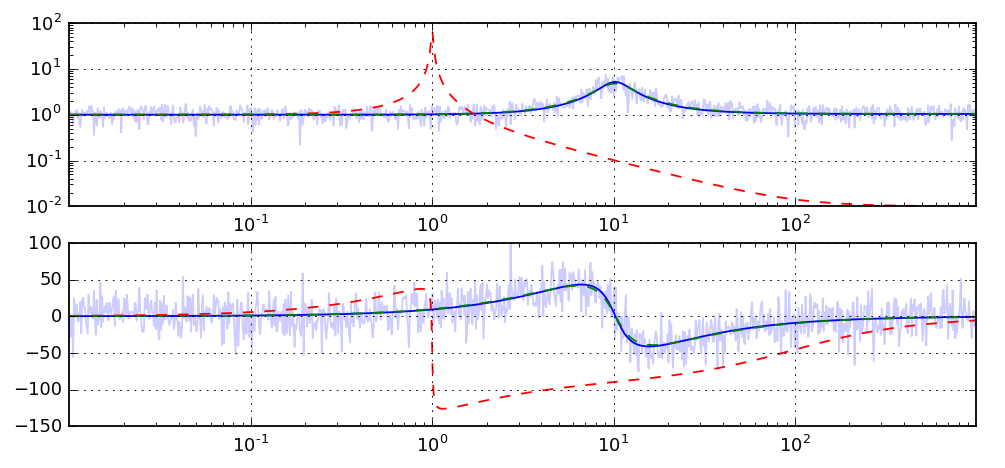

In [14]:
Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(
    sys.R1.F_Hz.val,
    abs(AC_data),
    alpha = .2,
    color = 'blue',
)
Fb.ax1.semilogx(
    sys.R1.F_Hz.val,
    np.angle(AC_data, deg = True),
    alpha = .2,
    color = 'blue',
)

readoutI =  sys.R1
Fb.ax0.loglog(
    readoutI.F_Hz.val,
    abs(readoutI.AC_sensitivity),
    color = 'blue',
)
Fb.ax1.semilogx(
    readoutI.F_Hz.val,
    np.angle(readoutI.AC_sensitivity, deg = True),
    color = 'blue',
)

readoutI =  sys_fit.R1
Fb.ax0.loglog(
    readoutI.F_Hz.val,
    abs(readoutI.AC_sensitivity),
    color = 'red',
    ls = '--',
)
Fb.ax1.semilogx(
    readoutI.F_Hz.val,
    np.angle(readoutI.AC_sensitivity, deg = True),
    color = 'red',
    ls = '--',
)

readoutI =  froot2.systems.xfer.R1
Fb.ax0.loglog(
    readoutI.F_Hz.val,
    abs(readoutI.AC_sensitivity),
    color = 'green',
    ls = '--',
)
Fb.ax1.semilogx(
    readoutI.F_Hz.val,
    np.angle(readoutI.AC_sensitivity, deg = True),
    color = 'green',
    ls = '--',
)


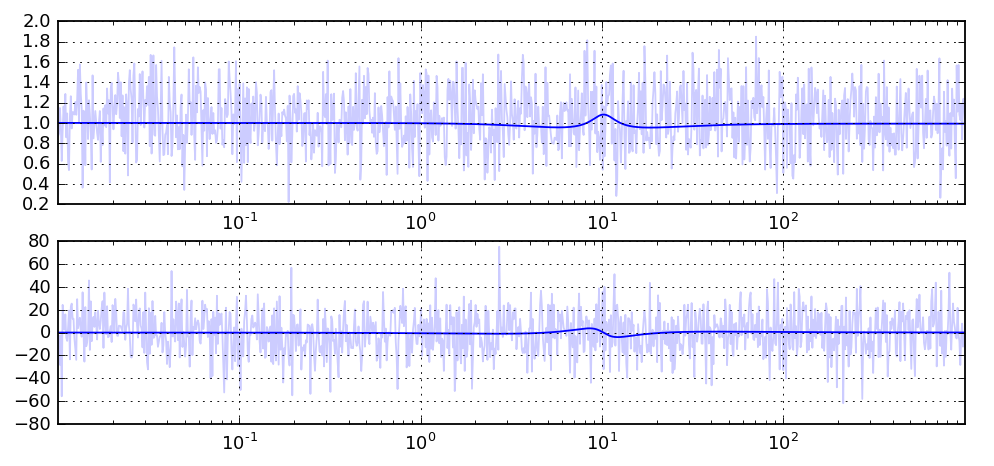

In [15]:
readout =  sys.R1
fit_readout =  froot2.systems.xfer.R1

Fb = mplfigB(Nrows=2)
Fb.ax0.semilogx(
    sys.R1.F_Hz.val,
    abs(AC_data / fit_readout.AC_sensitivity),
    alpha = .2,
    color = 'blue',
)
Fb.ax1.semilogx(
    sys.R1.F_Hz.val,
    np.angle(AC_data / fit_readout.AC_sensitivity, deg = True),
    alpha = .2,
    color = 'blue',
)

Fb.ax0.semilogx(
    readout.F_Hz.val,
    abs(readout.AC_sensitivity / fit_readout.AC_sensitivity),
    color = 'blue',
)
Fb.ax1.semilogx(
    readout.F_Hz.val,
    np.angle(readout.AC_sensitivity / fit_readout.AC_sensitivity, deg = True),
    color = 'blue',
)


In [8]:
sys.ctree.X1

ShadowBunchN([DeepBunchSingleAssign(
        'no_DC' = False,
        'poles_c' = {'0': (-2-10j)},
        'preserve_plane' = True,
        'zeros_r' = {'0': -10, '1': -10},
        )
    DeepBunchSingleAssign(
        'delay' = {'units': 'second', 'val': 0},
        'gain' = 1,
        )
    ])